In [1]:
# Import the requests library
import requests
# import the API key
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes into a list 
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [9]:
# Create a list for holding the cities 
cities = []
# Identify the nearest city for each longitude and latitude combination
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list
    if city not in cities: 
        cities.append(city)
# print the city length to confirm sufficient count
len(cities)

644

In [10]:
# Create an empty list to hold the weather data 
city_data = []
# Print the beginning of the logging 
print("Beginning Data Retrieval   ")
print("---------------------------")

# create counters 
record_count = 1
set_count = 1

# Loop through all of the cities in our list 
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL for each city 
    city_url = url + "&q=" + city.replace(" ", "+")

     # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')

    # Add 1 to the record count 
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | jiangyou
Processing Record 3 of Set 1 | zarubino
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | lavrentiya
Processing Record 7 of Set 1 | washington
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | taoudenni
Processing Record 10 of Set 1 | kondinskoye
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | lolua
City not found. Skipping...
Processing Record 13 of Set 1 | gigmoto
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | falefa
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | tema
Processing Record 21 of Set 1 | aklavik
Processing Record 22 of Set 1 | verkhne

Processing Record 40 of Set 4 | salalah
Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | goundam
Processing Record 43 of Set 4 | khatanga
Processing Record 44 of Set 4 | ouadda
Processing Record 45 of Set 4 | luena
Processing Record 46 of Set 4 | ongandjera
Processing Record 47 of Set 4 | grindavik
Processing Record 48 of Set 4 | baijiantan
Processing Record 49 of Set 4 | buala
Processing Record 50 of Set 4 | airai
Processing Record 1 of Set 5 | tabat
Processing Record 2 of Set 5 | talnakh
Processing Record 3 of Set 5 | requena
Processing Record 4 of Set 5 | gaya
Processing Record 5 of Set 5 | uhlove
Processing Record 6 of Set 5 | camacupa
Processing Record 7 of Set 5 | baia de arama
Processing Record 8 of Set 5 | isla mujeres
Processing Record 9 of Set 5 | mahina
Processing Record 10 of Set 5 | saint george
Processing Record 11 of Set 5 | tuggurt
City not found. Skipping...
Processing Record 12 of Set 5 | half moon bay
Processing Record 13 of Set 5 | cara

Processing Record 28 of Set 8 | kokopo
Processing Record 29 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 30 of Set 8 | key west
Processing Record 31 of Set 8 | guasdualito
Processing Record 32 of Set 8 | kysyl-syr
Processing Record 33 of Set 8 | bajil
Processing Record 34 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 35 of Set 8 | zhangye
Processing Record 36 of Set 8 | batouri
Processing Record 37 of Set 8 | oranjestad
Processing Record 38 of Set 8 | bilma
Processing Record 39 of Set 8 | dicabisagan
Processing Record 40 of Set 8 | magnitogorsk
Processing Record 41 of Set 8 | teya
Processing Record 42 of Set 8 | margate
Processing Record 43 of Set 8 | amderma
City not found. Skipping...
Processing Record 44 of Set 8 | dekar
Processing Record 45 of Set 8 | beloha
Processing Record 46 of Set 8 | abatskoye
Processing Record 47 of Set 8 | pangody
Processing Record 48 of Set 8 | gat
Processing Record 49 of Set 8 | vasterhaninge
Processing Record 50 of

Processing Record 18 of Set 12 | batagay
Processing Record 19 of Set 12 | barra do garcas
Processing Record 20 of Set 12 | qasigiannguit
Processing Record 21 of Set 12 | hirara
Processing Record 22 of Set 12 | pangai
Processing Record 23 of Set 12 | staryy nadym
Processing Record 24 of Set 12 | hameenlinna
Processing Record 25 of Set 12 | bairiki
Processing Record 26 of Set 12 | northam
Processing Record 27 of Set 12 | salisbury
Processing Record 28 of Set 12 | camana
Processing Record 29 of Set 12 | garanhuns
Processing Record 30 of Set 12 | marshalltown
Processing Record 31 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 32 of Set 12 | yeniseysk
Processing Record 33 of Set 12 | torbay
Processing Record 34 of Set 12 | desbiens
Processing Record 35 of Set 12 | yaan
Processing Record 36 of Set 12 | rusape
Processing Record 37 of Set 12 | kapit
Processing Record 38 of Set 12 | betanzos
Processing Record 39 of Set 12 | oktyabrskiy
Processing Record 40 of Set 12 | us

In [11]:
len(city_data)

594

In [12]:
# Convert the array of dictionaries into a Pandas DataFrame 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,57.47,90,100,18.32,NZ,2022-02-02 14:07:48
1,Jiangyou,31.7667,104.7167,41.52,78,100,0.76,CN,2022-02-02 14:06:02
2,Zarubino,42.6300,131.0922,16.25,57,7,22.39,RU,2022-02-02 14:07:48
3,Punta Arenas,-53.1500,-70.9167,50.11,66,75,8.05,CL,2022-02-02 14:03:53
4,Mataura,-46.1927,168.8643,58.98,99,100,5.01,NZ,2022-02-02 14:06:01
5,Lavrentiya,65.5833,-171.0000,-2.58,82,1,15.30,RU,2022-02-02 14:07:49
6,Washington,47.5001,-120.5015,25.84,78,100,1.12,US,2022-02-02 14:04:23
7,Rikitea,-23.1203,-134.9692,77.49,71,49,6.64,PF,2022-02-02 14:07:49
8,Taoudenni,22.6783,-3.9836,79.57,9,3,17.47,ML,2022-02-02 14:07:50
9,Kondinskoye,59.6481,67.4100,24.31,95,100,13.24,RU,2022-02-02 14:07:50


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-02-02 14:07:48,-46.6000,168.3333,57.47,90,100,18.32
1,Jiangyou,CN,2022-02-02 14:06:02,31.7667,104.7167,41.52,78,100,0.76
2,Zarubino,RU,2022-02-02 14:07:48,42.6300,131.0922,16.25,57,7,22.39
3,Punta Arenas,CL,2022-02-02 14:03:53,-53.1500,-70.9167,50.11,66,75,8.05
4,Mataura,NZ,2022-02-02 14:06:01,-46.1927,168.8643,58.98,99,100,5.01
5,Lavrentiya,RU,2022-02-02 14:07:49,65.5833,-171.0000,-2.58,82,1,15.30
6,Washington,US,2022-02-02 14:04:23,47.5001,-120.5015,25.84,78,100,1.12
7,Rikitea,PF,2022-02-02 14:07:49,-23.1203,-134.9692,77.49,71,49,6.64
8,Taoudenni,ML,2022-02-02 14:07:50,22.6783,-3.9836,79.57,9,3,17.47
9,Kondinskoye,RU,2022-02-02 14:07:50,59.6481,67.4100,24.31,95,100,13.24


In [14]:
# Create the output file, CSV
output_data_file = "weather_data/cities.csv"

#Export the city data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [15]:
# Extract relevent feilds from the DataFrame for plotting 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

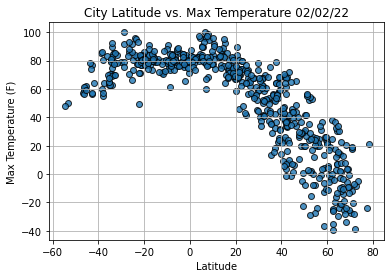

In [16]:
# Import the time module 
import time

# Build the scatter plot for the latitude vs. max temperature 
plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")
# Incorperate the other graph properties 
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")
# Show plot 
plt.show()

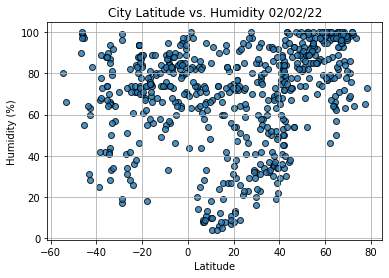

In [17]:
# Build the scatter plot for the latitude vs. max temperature 
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")
# Incorperate the other graph properties 
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")
# Show plot 
plt.show()

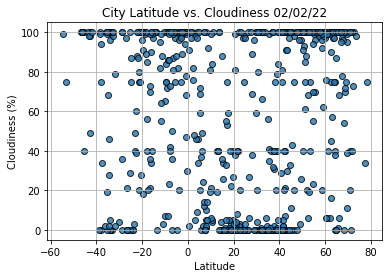

In [18]:
# Build the scatter plot for the latitude vs. max temperature 
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")
# Incorperate the other graph properties 
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the fig 
plt.savefig("weather_data/Fig3.png")
# Show plot 
plt.show()

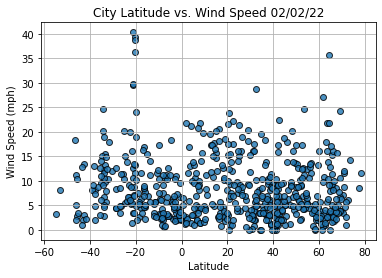

In [19]:
# Build the scatter plot for the latitude vs. max temperature 
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")
# Incorperate the other graph properties 
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")
# Show plot 
plt.show()

In [20]:
# Import linregress 
from scipy.stats import linregress

# Create a function to perfrm the linear regression for the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemnisphere data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the line regression "y values" from the slope and the intercept 
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line 
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line 
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index_13 = city_data_df.loc[13]
index_13

City                  New Norfolk
Country                        AU
Date          2022-02-02 14:07:18
Lat                      -42.7826
Lng                      147.0587
Max Temp                    56.71
Humidity                       60
Cloudiness                     98
Wind Speed                   3.06
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Jiangyou,CN,2022-02-02 14:06:02,31.7667,104.7167,41.52,78,100,0.76
2,Zarubino,RU,2022-02-02 14:07:48,42.6300,131.0922,16.25,57,7,22.39
5,Lavrentiya,RU,2022-02-02 14:07:49,65.5833,-171.0000,-2.58,82,1,15.30
6,Washington,US,2022-02-02 14:04:23,47.5001,-120.5015,25.84,78,100,1.12
8,Taoudenni,ML,2022-02-02 14:07:50,22.6783,-3.9836,79.57,9,3,17.47


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

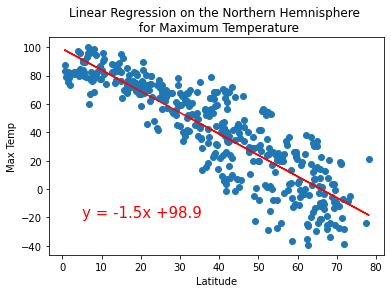

In [29]:
# Linear regression on the northern hemnisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemnisphere \n for Maximum Temperature',
                      'Max Temp', (5,-20))

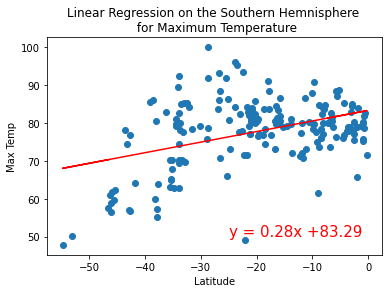

In [31]:
# Linear regression on the northern hemnisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemnisphere \n for Maximum Temperature',
                      'Max Temp', (-25,50))

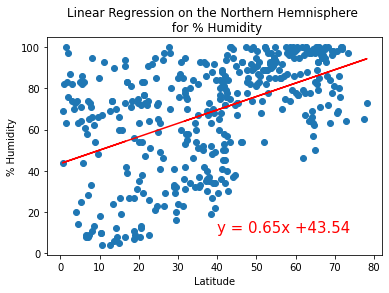

In [35]:
# Linear regression on the northern hemnisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemnisphere \n for % Humidity',
                      '% Humidity', (40,10))

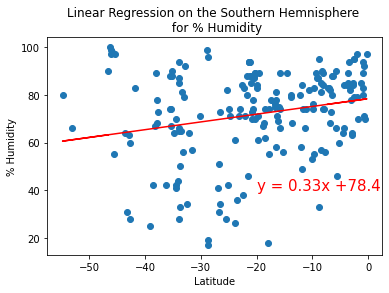

In [40]:
# Linear regression on the northern hemnisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemnisphere \n for % Humidity',
                      '% Humidity', (-20,40))

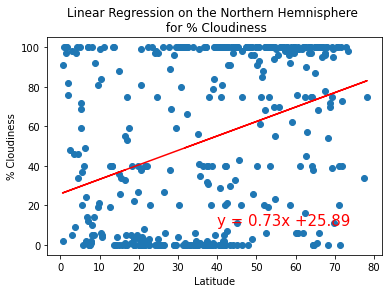

In [41]:
# Linear regression on the northern hemnisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemnisphere \n for % Cloudiness',
                      '% Cloudiness', (40,10))

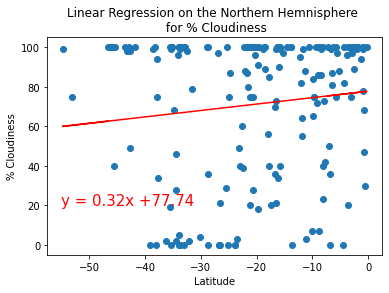

In [43]:
# Linear regression on the northern hemnisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemnisphere \n for % Cloudiness',
                      '% Cloudiness', (-55,20))

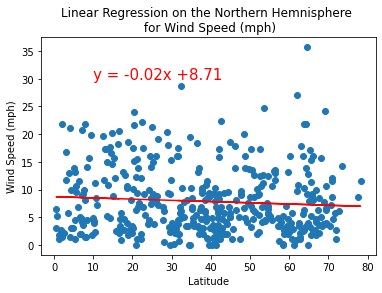

In [45]:
# Linear regression on the northern hemnisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemnisphere \n for Wind Speed (mph)',
                      'Wind Speed (mph)', (10,30))

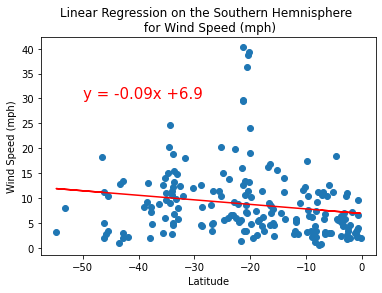

In [47]:
# Linear regression on the northern hemnisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemnisphere \n for Wind Speed (mph)',
                      'Wind Speed (mph)', (-50,30))